In [1]:
import pandas as pd
import numpy as np

In [2]:
dataframe = pd.read_csv('iris.csv')
dataframe.head(10)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [3]:
#(row, column)
dataframe.shape

(150, 5)

In [4]:
dataframe.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
dataframe.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,149.000000,149.000000,150.000000,148.000000
mean,5.843624,3.051007,3.758667,1.210135
std,0.830851,0.433499,1.764420,0.761643
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
dataframe.isnull().sum()


sepal_length    1
sepal_width     1
petal_length    0
petal_width     2
species         2
dtype: int64

In [7]:
int(dataframe.duplicated().sum())

3

In [8]:
#shows the rows with duplicate values
dataframe[dataframe.duplicated(keep=False)]

,sepal_length,sepal_width,petal_length,petal_width,species
9,4.9,3.1,1.5,0.1,setosa
34,4.9,3.1,1.5,0.1,setosa
37,4.9,3.1,1.5,0.1,setosa
101,5.8,2.7,5.1,1.9,virginica
142,5.8,2.7,5.1,1.9,virginica


In [11]:
#fill null row values (number type) with mean of column
#c = dataframe.select_dtypes(np.number).columns
#dataframe[c] = dataframe[c].fillna(dataframe[c].mean())
dataframe.fillna(dataframe.mean(numeric_only=True), inplace=True)

In [12]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         2
dtype: int64

In [16]:
#drop the null values in target column
dataframe.dropna(subset=['species'], inplace=True)

In [17]:
dataframe.isnull().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

In [18]:
#remove the duplicate values
dataframe.drop_duplicates(inplace=True)
dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [19]:
#drop the species column entirely with axis = 1
features = dataframe.drop('species', axis=1)
target = dataframe['species']

In [20]:
features

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
target

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 145, dtype: object

In [22]:
 #encode the target with numeric values
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
target = dataframe['species']
target = encoder.fit_transform(target)
target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [23]:
#convert the numeric values of features into a range of data from 0 to 1 so that
#the model does not get influenced by the larger values

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features_minmax = scaler.fit_transform(features)
features_minmax

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.42878449, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.43791946,

In [25]:
#follows normal distribution, mean will be 0 and standard deviation will be 1
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
features_std = scaler.fit_transform(features)
features_std

array([[-0.91504133,  1.04890031, -1.36295376, -1.36861492],
       [-1.15772763, -0.10769949, -1.36295376, -1.36861492],
       [-1.40041392,  0.35494043, -1.41998934, -1.36861492],
       [-1.52175706,  0.12362047, -1.30591817, -1.36861492],
       [-1.03638448,  1.28022027, -1.36295376, -1.36861492],
       [-0.5510119 ,  1.97418015, -1.19184701, -1.10173918],
       [-1.52175706,  0.81758035, -1.36295376, -1.23517705],
       [-1.03638448,  0.81758035, -1.30591817, -1.36861492],
       [-1.76444336, -0.33901945, -1.36295376, -1.36861492],
       [-1.15772763,  0.12362047, -1.30591817, -1.50205279],
       [-0.5510119 ,  1.51154023, -1.30591817, -1.36861492],
       [-1.27907077,  0.81758035, -1.24888259, -1.36861492],
       [-1.27907077, -0.10769949, -1.36295376, -1.50205279],
       [-1.8857865 , -0.10769949, -1.53406051, -1.50205279],
       [-0.01270438,  2.20550011, -1.47702492, -1.36861492],
       [-0.18698246,  3.13077994, -1.30591817, -1.10173918],
       [-0.5510119 ,  1.

In [31]:
features_df = pd.DataFrame(features_std, columns=features.columns) #scaled feature dataframe, not array
target_df = pd.DataFrame(target, columns=['species'])

In [32]:
#correlation analysis of features with target
target_series = target_df['species']
correlations = features_df.corrwith(target_series)
correlations
#more than 0.7 is good correlation, abs value is considered
#for many columns, we can remove the columns with low correlation

sepal_length    0.786367
sepal_width    -0.402850
petal_length    0.948710
petal_width     0.944835
dtype: float64

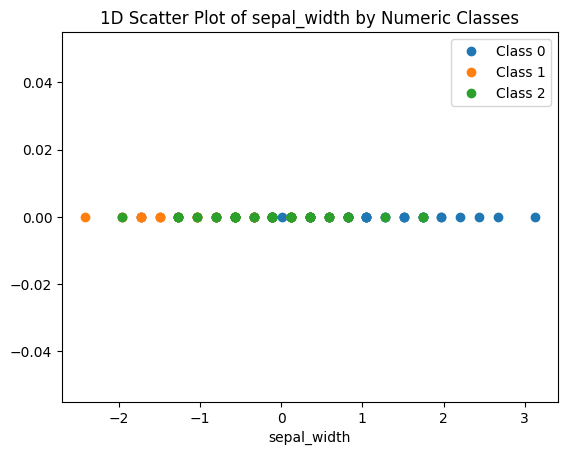

In [33]:
import matplotlib.pyplot as plt

# Separate the data based on numeric labels
class_0 = features_df.loc[target_df["species"] == 0]
class_1 = features_df.loc[target_df["species"] == 1]
class_2 = features_df.loc[target_df["species"] == 2]

# Create a 1D scatter plot for sepal_width with numeric labels
plt.plot(class_0["sepal_width"], np.zeros_like(class_0['sepal_width']), 'o', label='Class 0')
plt.plot(class_1["sepal_width"], np.zeros_like(class_1['sepal_width']), 'o', label='Class 1')
plt.plot(class_2["sepal_width"], np.zeros_like(class_2['sepal_width']), 'o', label='Class 2')

plt.legend()
plt.xlabel('sepal_width')
plt.title('1D Scatter Plot of sepal_width by Numeric Classes')
plt.show()

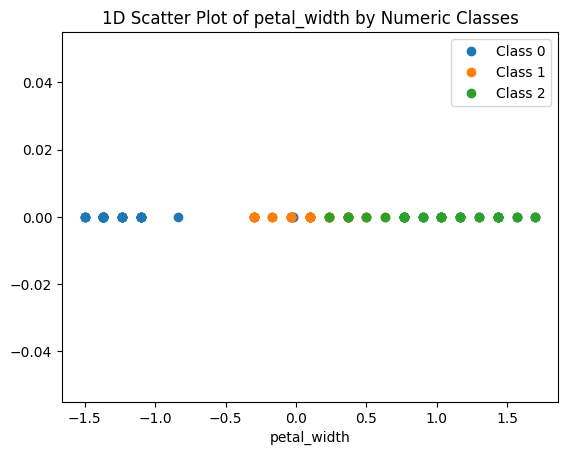

In [34]:
# Separate the data based on numeric labels
class_0 = features_df.loc[target_df["species"] == 0]
class_1 = features_df.loc[target_df["species"] == 1]
class_2 = features_df.loc[target_df["species"] == 2]

# Create a 1D scatter plot for petal_width with numeric labels
plt.plot(class_0["petal_width"], np.zeros_like(class_0['petal_width']), 'o', label='Class 0')
plt.plot(class_1["petal_width"], np.zeros_like(class_1['petal_width']), 'o', label='Class 1')
plt.plot(class_2["petal_width"], np.zeros_like(class_2['petal_width']), 'o', label='Class 2')

plt.legend()
plt.xlabel('petal_width')
plt.title('1D Scatter Plot of petal_width by Numeric Classes')
plt.show()

In [35]:
# create a simple classifier
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(features_std, target, test_size=0.1, random_state=42)

model = LogisticRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
accuracy

0.9333333333333333